### This code will clean up the data set "COVID-19 in USA" available at https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-usa?resource=download

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Three files are given in the dataset:
- ##### us_states_covid19_daily
    - This file contains data pertaining to covid-19 based on US states
- ##### us_counties_covid19_daily
    - This file contains data pertaining to covid-19 based on counties in each US state
- ##### us_covid19_daily
    - This file is basically a lump of the prior two files, containing covid-19 data based on date instead of state/county

In [82]:
# Read the CSV file into a pandas DataFrame... 
# Uncomment the relevant lines for the file you want to process (three were provided in the dataset)
# This code assumes that the csv files are in the same directory as this file, otherwise need to specify path

# This set shows covid19 daily case data for every state in the US
df = pd.read_csv("us_states_covid19_daily.csv")
df.dataframename = "us_states_covid19_daily" 

# This set shows covid19 daily case data for every county in every state in the US
# df = pd.read_csv("us_counties_covid19_daily.csv")
# df.dataframename = "us_counties_covid19_daily" 

# This set show covid19 daily case data based on date... clumps data for every state/county together
# df = pd.read_csv("us_covid19_daily.csv")
# df.dataframename = "us_covid19_daily" 

In [83]:
# Drop any columns with missing values 
# ... maybe not the best idea as some datasets have lots of blank values and result in small result set ...
# ... but you can uncomment this line if you want that ...
# df.dropna(inplace=True,axis=1)

# Replace empty values with a NaN (or could make it 0 if thats better by replacing np.NAN with 0)
df.replace("", np.NAN, inplace=True)
df.replace(" ", np.NAN, inplace=True)


In [84]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned data to a new CSV file... can add index=False argument if you don't want indices in output csv
df.to_csv(f"{df.dataframename}_cleaned.csv")

In [85]:
# This mostly for just seeing the effects of the above processing steps
df.head(n=10)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN
5,20201206,CA,1341700.0,NaN,23853346.0,NaN,totalTestsViral,25195046.0,10624.0,NaN,...,25195046,85,0,2fbb11905a59ffc894c8ec1ec6f051691be2381c,0,0,0,0,0,NaN
6,20201206,CO,260581.0,11069.0,1608829.0,NaN,totalTestEncountersViral,3478160.0,1750.0,14868.0,...,1869410,0,24,b4df83fcc4f4ed0a3f62c46ac7c1c5122afad538,0,0,0,0,0,NaN
7,20201206,CT,127715.0,8131.0,3294383.0,NaN,posNeg,3422098.0,1150.0,12257.0,...,3422098,0,0,9fbbab70cc68c6bd651d4d7782679d747ebaf836,0,0,0,0,0,NaN
8,20201206,DC,23136.0,NaN,711497.0,NaN,totalTestEncountersViral,734633.0,171.0,NaN,...,734633,2,0,79db850b5099f9feec14ec9d23720b9c507c0e07,0,0,0,0,0,NaN
9,20201206,DE,39912.0,1550.0,400854.0,NaN,totalTestEncountersViral,778298.0,315.0,NaN,...,440766,11,0,9f96a8c6277af3fc08cde31741aea66a3cbf381a,0,0,0,0,0,NaN


C:\Users\jcam3\AppData\Local\Temp\ipykernel_1680\2732677242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


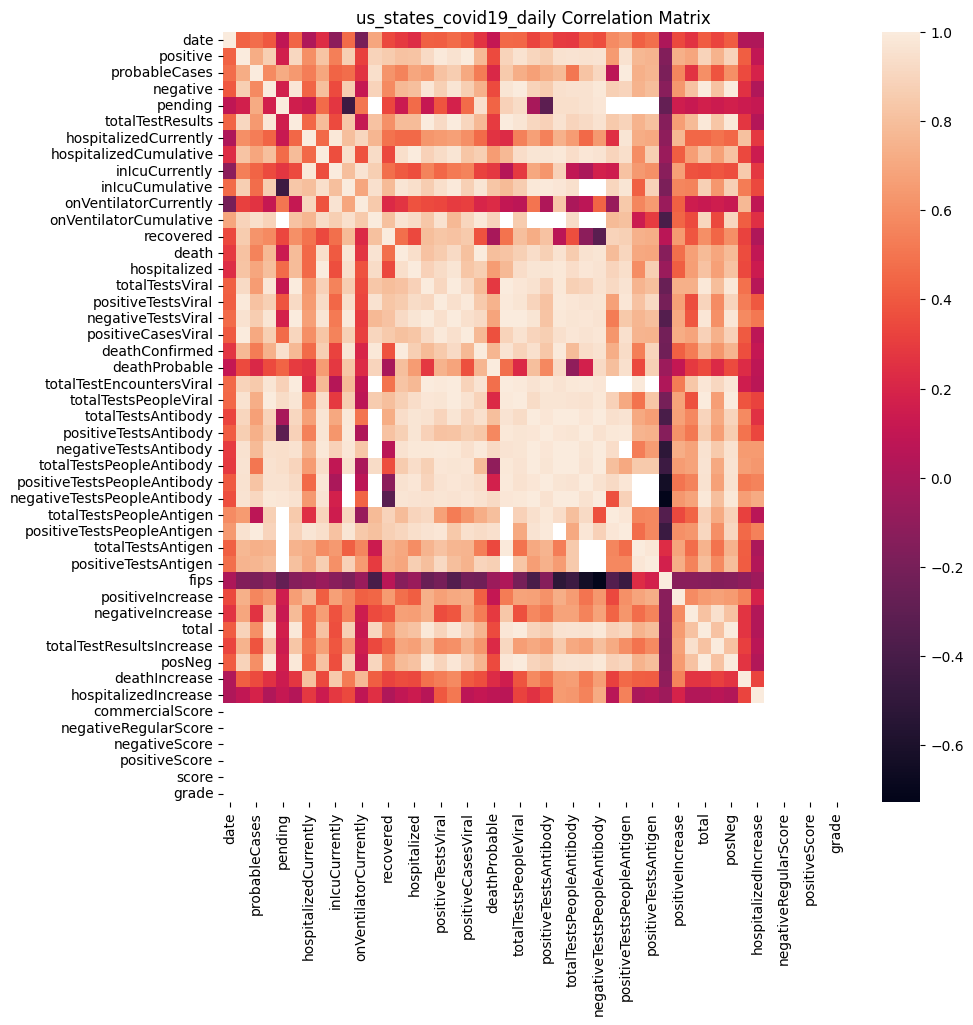

In [86]:
# Create correlation matrix
correlation = df.corr()

# Visualize the correlation matrix as a heatmap for our data set
plt.figure(figsize=(10,10))
sns.heatmap(correlation)
plt.title(f"{df.dataframename} Correlation Matrix")
plt.show()